In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['font.size']=20

# Data Preparation

In [13]:
data_raw=pd.read_csv('data_for_reliance_project_02_03_2021_modified.csv')
print(data_raw.shape)
data_raw

(60, 19)


,Exp id,Internal Donor,Internal Donor (database ref.),Internal Donor (Properties),External Donor,External Donor (PubChem CID),External Donor (CAS Registry Number),External Donor (database ref.),Donor/AlEt3 (External Donor (Properties),Catalyst,Catalyst (Properties),Co-Catalyst,Co-Catalyst (Properties),Solvent,Solvent (Properties),Temperature,Pressure,Target Variable (eg. Selectivity),Activity (Kg/g Cat.h)
0,1,NaN,NaN,NaN,Dimethyldiethoxysilane (DMDES),62322,78-62-6,NaN,0.200,MgCl2/TiCl4/DIBP-AlEt3/ext.donor,NaN,AlEt3,NaN,NaN,NaN,60 ?C,NaN,NaN,5.1
1,2,NaN,NaN,NaN,Dimethyldiethoxysilane (DMDES),62322,78-62-7,NaN,0.100,MgCl2/TiCl4/DIBP-AlEt3/ext.donor,NaN,AlEt3,NaN,NaN,NaN,60 ?C,NaN,NaN,9.2
2,3,NaN,NaN,NaN,Dimethyldiethoxysilane (DMDES),62322,78-62-8,NaN,0.050,MgCl2/TiCl4/DIBP-AlEt3/ext.donor,NaN,AlEt3,NaN,NaN,NaN,60 ?C,NaN,NaN,8.7
3,4,NaN,NaN,NaN,Dimethyldiisopropenoxysilane (DMDIPS),10942923,63746-11-2,NaN,0.200,MgCl2/TiCl4/DIBP-AlEt3/ext.donor,NaN,AlEt3,NaN,NaN,NaN,60 ?C,NaN,NaN,6.5
4,5,NaN,NaN,NaN,Dimethyldiisopropenoxysilane (DMDIPS),10942923,63746-11-3,NaN,0.100,MgCl2/TiCl4/DIBP-AlEt3/ext.donor,NaN,AlEt3,NaN,NaN,NaN,60 ?C,NaN,NaN,4.5
5,6,NaN,NaN,NaN,Dimethyldiisopropenoxysilane (DMDIPS),10942923,63746-11-4,NaN,0.050,MgCl2/TiCl4/DIBP-AlEt3/ext.donor,NaN,AlEt3,NaN,NaN,NaN,60 ?C,NaN,NaN,8.7
6,7,NaN,NaN,NaN,Diphenyldimethoxysilane (DPDMS),81284,6843-66-9,NaN,0.200,MgCl2/TiCl4/DIBP-AlEt3/ext.donor,NaN,AlEt3,NaN,NaN,NaN,60 ?C,NaN,NaN,7.6
7,8,NaN,NaN,NaN,Diphenyldimethoxysilane (DPDMS),81284,6843-66-10,NaN,0.100,MgCl2/TiCl4/DIBP-AlEt3/ext.donor,NaN,AlEt3,NaN,NaN,NaN,60 ?C,NaN,NaN,8.0
8,9,NaN,NaN,NaN,Diphenyldimethoxysilane (DPDMS),81284,6843-66-11,NaN,0.050,MgCl2/TiCl4/DIBP-AlEt3/ext.donor,NaN,AlEt3,NaN,NaN,NaN,60 ?C,NaN,NaN,11.4
9,10,NaN,NaN,NaN,Diphenylsilane (DPS),6327659,775-12-2,NaN,0.200,MgCl2/TiCl4/DIBP-AlEt3/ext.donor,NaN,AlEt3,NaN,NaN,NaN,60 ?C,NaN,NaN,10.8


In [14]:
data_raw.columns

Index(['Exp id', 'Internal Donor', 'Internal Donor (database ref.)',
       'Internal Donor (Properties)', 'External Donor',
       'External Donor (PubChem CID)', 'External Donor (CAS Registry Number)',
       'External Donor (database ref.)',
       ' Donor/AlEt3 (External Donor (Properties)', 'Catalyst',
       'Catalyst (Properties)', 'Co-Catalyst', 'Co-Catalyst (Properties)',
       'Solvent', 'Solvent (Properties)', 'Temperature', 'Pressure',
       'Target Variable (eg. Selectivity)', 'Activity (Kg/g Cat.h)'],
      dtype='object')

In [15]:
data=data_raw.copy()
data['Temperature']=data_raw['Temperature'].apply(lambda x:x.split('?C')[0].strip())
data

,Exp id,Internal Donor,Internal Donor (database ref.),Internal Donor (Properties),External Donor,External Donor (PubChem CID),External Donor (CAS Registry Number),External Donor (database ref.),Donor/AlEt3 (External Donor (Properties),Catalyst,Catalyst (Properties),Co-Catalyst,Co-Catalyst (Properties),Solvent,Solvent (Properties),Temperature,Pressure,Target Variable (eg. Selectivity),Activity (Kg/g Cat.h)
0,1,NaN,NaN,NaN,Dimethyldiethoxysilane (DMDES),62322,78-62-6,NaN,0.200,MgCl2/TiCl4/DIBP-AlEt3/ext.donor,NaN,AlEt3,NaN,NaN,NaN,60,NaN,NaN,5.1
1,2,NaN,NaN,NaN,Dimethyldiethoxysilane (DMDES),62322,78-62-7,NaN,0.100,MgCl2/TiCl4/DIBP-AlEt3/ext.donor,NaN,AlEt3,NaN,NaN,NaN,60,NaN,NaN,9.2
2,3,NaN,NaN,NaN,Dimethyldiethoxysilane (DMDES),62322,78-62-8,NaN,0.050,MgCl2/TiCl4/DIBP-AlEt3/ext.donor,NaN,AlEt3,NaN,NaN,NaN,60,NaN,NaN,8.7
3,4,NaN,NaN,NaN,Dimethyldiisopropenoxysilane (DMDIPS),10942923,63746-11-2,NaN,0.200,MgCl2/TiCl4/DIBP-AlEt3/ext.donor,NaN,AlEt3,NaN,NaN,NaN,60,NaN,NaN,6.5
4,5,NaN,NaN,NaN,Dimethyldiisopropenoxysilane (DMDIPS),10942923,63746-11-3,NaN,0.100,MgCl2/TiCl4/DIBP-AlEt3/ext.donor,NaN,AlEt3,NaN,NaN,NaN,60,NaN,NaN,4.5
5,6,NaN,NaN,NaN,Dimethyldiisopropenoxysilane (DMDIPS),10942923,63746-11-4,NaN,0.050,MgCl2/TiCl4/DIBP-AlEt3/ext.donor,NaN,AlEt3,NaN,NaN,NaN,60,NaN,NaN,8.7
6,7,NaN,NaN,NaN,Diphenyldimethoxysilane (DPDMS),81284,6843-66-9,NaN,0.200,MgCl2/TiCl4/DIBP-AlEt3/ext.donor,NaN,AlEt3,NaN,NaN,NaN,60,NaN,NaN,7.6
7,8,NaN,NaN,NaN,Diphenyldimethoxysilane (DPDMS),81284,6843-66-10,NaN,0.100,MgCl2/TiCl4/DIBP-AlEt3/ext.donor,NaN,AlEt3,NaN,NaN,NaN,60,NaN,NaN,8.0
8,9,NaN,NaN,NaN,Diphenyldimethoxysilane (DPDMS),81284,6843-66-11,NaN,0.050,MgCl2/TiCl4/DIBP-AlEt3/ext.donor,NaN,AlEt3,NaN,NaN,NaN,60,NaN,NaN,11.4
9,10,NaN,NaN,NaN,Diphenylsilane (DPS),6327659,775-12-2,NaN,0.200,MgCl2/TiCl4/DIBP-AlEt3/ext.donor,NaN,AlEt3,NaN,NaN,NaN,60,NaN,NaN,10.8


In [16]:
data=data.dropna(axis=1)
data=data.loc[:, (data != data.iloc[0]).any()] 
print(data.shape)
data

(60, 6)


,Exp id,External Donor,External Donor (PubChem CID),External Donor (CAS Registry Number),Donor/AlEt3 (External Donor (Properties),Activity (Kg/g Cat.h)
0,1,Dimethyldiethoxysilane (DMDES),62322,78-62-6,0.200,5.1
1,2,Dimethyldiethoxysilane (DMDES),62322,78-62-7,0.100,9.2
2,3,Dimethyldiethoxysilane (DMDES),62322,78-62-8,0.050,8.7
3,4,Dimethyldiisopropenoxysilane (DMDIPS),10942923,63746-11-2,0.200,6.5
4,5,Dimethyldiisopropenoxysilane (DMDIPS),10942923,63746-11-3,0.100,4.5
5,6,Dimethyldiisopropenoxysilane (DMDIPS),10942923,63746-11-4,0.050,8.7
6,7,Diphenyldimethoxysilane (DPDMS),81284,6843-66-9,0.200,7.6
7,8,Diphenyldimethoxysilane (DPDMS),81284,6843-66-10,0.100,8.0
8,9,Diphenyldimethoxysilane (DPDMS),81284,6843-66-11,0.050,11.4
9,10,Diphenylsilane (DPS),6327659,775-12-2,0.200,10.8


In [17]:
import os
import pubchempy as pcp

def downlaod_molecules(x):
    file_name=f"{x['External Donor'].strip().replace(' ','_')}_{x['External Donor (PubChem CID)']}"
    file_path=f"molecules/{file_name}.sdf"
    print(x.name,file_path,end=' -- ')
    if os.path.isfile(file_path):
        print('Already is present')
        pass
    else:
        print('Not Found downloading...')
        pcp.download('sdf', file_path, str(x['External Donor (PubChem CID)']), 'cid', record_type='2d',overwrite=True)
    return file_name
    
data['sdf_file_name']=data.apply(downlaod_molecules,axis=1)
data

0 molecules/Dimethyldiethoxysilane_(DMDES)_62322.sdf -- Already is present
1 molecules/Dimethyldiethoxysilane_(DMDES)_62322.sdf -- Already is present
2 molecules/Dimethyldiethoxysilane_(DMDES)_62322.sdf -- Already is present
3 molecules/Dimethyldiisopropenoxysilane_(DMDIPS)_10942923.sdf -- Already is present
4 molecules/Dimethyldiisopropenoxysilane_(DMDIPS)_10942923.sdf -- Already is present
5 molecules/Dimethyldiisopropenoxysilane_(DMDIPS)_10942923.sdf -- Already is present
6 molecules/Diphenyldimethoxysilane_(DPDMS)_81284.sdf -- Already is present
7 molecules/Diphenyldimethoxysilane_(DPDMS)_81284.sdf -- Already is present
8 molecules/Diphenyldimethoxysilane_(DPDMS)_81284.sdf -- Already is present
9 molecules/Diphenylsilane_(DPS)_6327659.sdf -- Already is present
10 molecules/Diphenylsilane_(DPS)_6327659.sdf -- Already is present
11 molecules/Diphenylsilane_(DPS)_6327659.sdf -- Already is present
12 molecules/Dodecyltriethoxysilan_(DTES)_87696.sdf -- Already is present
13 molecules/Do

,Exp id,External Donor,External Donor (PubChem CID),External Donor (CAS Registry Number),Donor/AlEt3 (External Donor (Properties),Activity (Kg/g Cat.h),sdf_file_name
0,1,Dimethyldiethoxysilane (DMDES),62322,78-62-6,0.200,5.1,Dimethyldiethoxysilane_(DMDES)_62322
1,2,Dimethyldiethoxysilane (DMDES),62322,78-62-7,0.100,9.2,Dimethyldiethoxysilane_(DMDES)_62322
2,3,Dimethyldiethoxysilane (DMDES),62322,78-62-8,0.050,8.7,Dimethyldiethoxysilane_(DMDES)_62322
3,4,Dimethyldiisopropenoxysilane (DMDIPS),10942923,63746-11-2,0.200,6.5,Dimethyldiisopropenoxysilane_(DMDIPS)_10942923
4,5,Dimethyldiisopropenoxysilane (DMDIPS),10942923,63746-11-3,0.100,4.5,Dimethyldiisopropenoxysilane_(DMDIPS)_10942923
5,6,Dimethyldiisopropenoxysilane (DMDIPS),10942923,63746-11-4,0.050,8.7,Dimethyldiisopropenoxysilane_(DMDIPS)_10942923
6,7,Diphenyldimethoxysilane (DPDMS),81284,6843-66-9,0.200,7.6,Diphenyldimethoxysilane_(DPDMS)_81284
7,8,Diphenyldimethoxysilane (DPDMS),81284,6843-66-10,0.100,8.0,Diphenyldimethoxysilane_(DPDMS)_81284
8,9,Diphenyldimethoxysilane (DPDMS),81284,6843-66-11,0.050,11.4,Diphenyldimethoxysilane_(DPDMS)_81284
9,10,Diphenylsilane (DPS),6327659,775-12-2,0.200,10.8,Diphenylsilane_(DPS)_6327659


In [18]:
from rdkit import Chem

data['rdkit_mol']=data.apply(lambda x:Chem.SDMolSupplier(f"molecules/{x['sdf_file_name']}.sdf")[0],axis=1)
data

,Exp id,External Donor,External Donor (PubChem CID),External Donor (CAS Registry Number),Donor/AlEt3 (External Donor (Properties),Activity (Kg/g Cat.h),sdf_file_name,rdkit_mol
0,1,Dimethyldiethoxysilane (DMDES),62322,78-62-6,0.200,5.1,Dimethyldiethoxysilane_(DMDES)_62322,<rdkit.Chem.rdchem.Mol object at 0x7fbafbf31d00>
1,2,Dimethyldiethoxysilane (DMDES),62322,78-62-7,0.100,9.2,Dimethyldiethoxysilane_(DMDES)_62322,<rdkit.Chem.rdchem.Mol object at 0x7fbafbf31d50>
2,3,Dimethyldiethoxysilane (DMDES),62322,78-62-8,0.050,8.7,Dimethyldiethoxysilane_(DMDES)_62322,<rdkit.Chem.rdchem.Mol object at 0x7fbafbf31da0>
3,4,Dimethyldiisopropenoxysilane (DMDIPS),10942923,63746-11-2,0.200,6.5,Dimethyldiisopropenoxysilane_(DMDIPS)_10942923,<rdkit.Chem.rdchem.Mol object at 0x7fbafbf31df0>
4,5,Dimethyldiisopropenoxysilane (DMDIPS),10942923,63746-11-3,0.100,4.5,Dimethyldiisopropenoxysilane_(DMDIPS)_10942923,<rdkit.Chem.rdchem.Mol object at 0x7fbafbf31ad0>
5,6,Dimethyldiisopropenoxysilane (DMDIPS),10942923,63746-11-4,0.050,8.7,Dimethyldiisopropenoxysilane_(DMDIPS)_10942923,<rdkit.Chem.rdchem.Mol object at 0x7fbafbf31a80>
6,7,Diphenyldimethoxysilane (DPDMS),81284,6843-66-9,0.200,7.6,Diphenyldimethoxysilane_(DPDMS)_81284,<rdkit.Chem.rdchem.Mol object at 0x7fbafbf31c60>
7,8,Diphenyldimethoxysilane (DPDMS),81284,6843-66-10,0.100,8.0,Diphenyldimethoxysilane_(DPDMS)_81284,<rdkit.Chem.rdchem.Mol object at 0x7fbafbf31710>
8,9,Diphenyldimethoxysilane (DPDMS),81284,6843-66-11,0.050,11.4,Diphenyldimethoxysilane_(DPDMS)_81284,<rdkit.Chem.rdchem.Mol object at 0x7fbafbf31850>
9,10,Diphenylsilane (DPS),6327659,775-12-2,0.200,10.8,Diphenylsilane_(DPS)_6327659,<rdkit.Chem.rdchem.Mol object at 0x7fbafbf31800>


# Feature Generation

In [19]:
from rdkit import Chem
from rdkit.Chem import Descriptors
from IPython.display import clear_output

rdkit_desc_2d_list=[(desc_name+'_2d_rdkit',desc_func) for desc_name,desc_func in Descriptors.descList]

for desc_name,desc_func in rdkit_desc_2d_list:
    desc_value_list=[]
    for idx,row in data.iterrows():
        desc_value_list.append(desc_func(row['rdkit_mol']))
    data[desc_name]=desc_value_list

print(data.shape)
data

(60, 208)


,Exp id,External Donor,External Donor (PubChem CID),External Donor (CAS Registry Number),Donor/AlEt3 (External Donor (Properties),Activity (Kg/g Cat.h),sdf_file_name,rdkit_mol,MaxEStateIndex_2d_rdkit,MinEStateIndex_2d_rdkit,...,fr_sulfide_2d_rdkit,fr_sulfonamd_2d_rdkit,fr_sulfone_2d_rdkit,fr_term_acetylene_2d_rdkit,fr_tetrazole_2d_rdkit,fr_thiazole_2d_rdkit,fr_thiocyan_2d_rdkit,fr_thiophene_2d_rdkit,fr_unbrch_alkane_2d_rdkit,fr_urea_2d_rdkit
0,1,Dimethyldiethoxysilane (DMDES),62322,78-62-6,0.200,5.1,Dimethyldiethoxysilane_(DMDES)_62322,<rdkit.Chem.rdchem.Mol object at 0x7fbafbf31d00>,5.386389,-1.703318,...,0,0,0,0,0,0,0,0,0,0
1,2,Dimethyldiethoxysilane (DMDES),62322,78-62-7,0.100,9.2,Dimethyldiethoxysilane_(DMDES)_62322,<rdkit.Chem.rdchem.Mol object at 0x7fbafbf31d50>,5.386389,-1.703318,...,0,0,0,0,0,0,0,0,0,0
2,3,Dimethyldiethoxysilane (DMDES),62322,78-62-8,0.050,8.7,Dimethyldiethoxysilane_(DMDES)_62322,<rdkit.Chem.rdchem.Mol object at 0x7fbafbf31da0>,5.386389,-1.703318,...,0,0,0,0,0,0,0,0,0,0
3,4,Dimethyldiisopropenoxysilane (DMDIPS),10942923,63746-11-2,0.200,6.5,Dimethyldiisopropenoxysilane_(DMDIPS)_10942923,<rdkit.Chem.rdchem.Mol object at 0x7fbafbf31df0>,5.409861,-2.028549,...,0,0,0,0,0,0,0,0,0,0
4,5,Dimethyldiisopropenoxysilane (DMDIPS),10942923,63746-11-3,0.100,4.5,Dimethyldiisopropenoxysilane_(DMDIPS)_10942923,<rdkit.Chem.rdchem.Mol object at 0x7fbafbf31ad0>,5.409861,-2.028549,...,0,0,0,0,0,0,0,0,0,0
5,6,Dimethyldiisopropenoxysilane (DMDIPS),10942923,63746-11-4,0.050,8.7,Dimethyldiisopropenoxysilane_(DMDIPS)_10942923,<rdkit.Chem.rdchem.Mol object at 0x7fbafbf31a80>,5.409861,-2.028549,...,0,0,0,0,0,0,0,0,0,0
6,7,Diphenyldimethoxysilane (DPDMS),81284,6843-66-9,0.200,7.6,Diphenyldimethoxysilane_(DPDMS)_81284,<rdkit.Chem.rdchem.Mol object at 0x7fbafbf31c60>,5.775880,-2.495648,...,0,0,0,0,0,0,0,0,0,0
7,8,Diphenyldimethoxysilane (DPDMS),81284,6843-66-10,0.100,8.0,Diphenyldimethoxysilane_(DPDMS)_81284,<rdkit.Chem.rdchem.Mol object at 0x7fbafbf31710>,5.775880,-2.495648,...,0,0,0,0,0,0,0,0,0,0
8,9,Diphenyldimethoxysilane (DPDMS),81284,6843-66-11,0.050,11.4,Diphenyldimethoxysilane_(DPDMS)_81284,<rdkit.Chem.rdchem.Mol object at 0x7fbafbf31850>,5.775880,-2.495648,...,0,0,0,0,0,0,0,0,0,0
9,10,Diphenylsilane (DPS),6327659,775-12-2,0.200,10.8,Diphenylsilane_(DPS)_6327659,<rdkit.Chem.rdchem.Mol object at 0x7fbafbf31800>,2.172068,0.776728,...,0,0,0,0,0,0,0,0,0,0


# Pre-Processing

In [20]:
data=data.dropna(axis=1)
data=data.loc[:, (data != data.iloc[0]).any()]
print(data.shape)
data

(60, 97)


,Exp id,External Donor,External Donor (PubChem CID),External Donor (CAS Registry Number),Donor/AlEt3 (External Donor (Properties),Activity (Kg/g Cat.h),sdf_file_name,rdkit_mol,MaxEStateIndex_2d_rdkit,MinEStateIndex_2d_rdkit,...,NumAromaticRings_2d_rdkit,NumHAcceptors_2d_rdkit,NumHeteroatoms_2d_rdkit,NumRotatableBonds_2d_rdkit,RingCount_2d_rdkit,MolLogP_2d_rdkit,MolMR_2d_rdkit,fr_allylic_oxid_2d_rdkit,fr_benzene_2d_rdkit,fr_unbrch_alkane_2d_rdkit
0,1,Dimethyldiethoxysilane (DMDES),62322,78-62-6,0.200,5.1,Dimethyldiethoxysilane_(DMDES)_62322,<rdkit.Chem.rdchem.Mol object at 0x7fbafbf31d00>,5.386389,-1.703318,...,0,2,3,4,0,1.7612,40.734,0,0,0
1,2,Dimethyldiethoxysilane (DMDES),62322,78-62-7,0.100,9.2,Dimethyldiethoxysilane_(DMDES)_62322,<rdkit.Chem.rdchem.Mol object at 0x7fbafbf31d50>,5.386389,-1.703318,...,0,2,3,4,0,1.7612,40.734,0,0,0
2,3,Dimethyldiethoxysilane (DMDES),62322,78-62-8,0.050,8.7,Dimethyldiethoxysilane_(DMDES)_62322,<rdkit.Chem.rdchem.Mol object at 0x7fbafbf31da0>,5.386389,-1.703318,...,0,2,3,4,0,1.7612,40.734,0,0,0
3,4,Dimethyldiisopropenoxysilane (DMDIPS),10942923,63746-11-2,0.200,6.5,Dimethyldiisopropenoxysilane_(DMDIPS)_10942923,<rdkit.Chem.rdchem.Mol object at 0x7fbafbf31df0>,5.409861,-2.028549,...,0,2,3,4,0,2.7886,49.280,2,0,0
4,5,Dimethyldiisopropenoxysilane (DMDIPS),10942923,63746-11-3,0.100,4.5,Dimethyldiisopropenoxysilane_(DMDIPS)_10942923,<rdkit.Chem.rdchem.Mol object at 0x7fbafbf31ad0>,5.409861,-2.028549,...,0,2,3,4,0,2.7886,49.280,2,0,0
5,6,Dimethyldiisopropenoxysilane (DMDIPS),10942923,63746-11-4,0.050,8.7,Dimethyldiisopropenoxysilane_(DMDIPS)_10942923,<rdkit.Chem.rdchem.Mol object at 0x7fbafbf31a80>,5.409861,-2.028549,...,0,2,3,4,0,2.7886,49.280,2,0,0
6,7,Diphenyldimethoxysilane (DPDMS),81284,6843-66-9,0.200,7.6,Diphenyldimethoxysilane_(DPDMS)_81284,<rdkit.Chem.rdchem.Mol object at 0x7fbafbf31c60>,5.775880,-2.495648,...,2,2,3,4,2,1.5358,71.924,0,2,0
7,8,Diphenyldimethoxysilane (DPDMS),81284,6843-66-10,0.100,8.0,Diphenyldimethoxysilane_(DPDMS)_81284,<rdkit.Chem.rdchem.Mol object at 0x7fbafbf31710>,5.775880,-2.495648,...,2,2,3,4,2,1.5358,71.924,0,2,0
8,9,Diphenyldimethoxysilane (DPDMS),81284,6843-66-11,0.050,11.4,Diphenyldimethoxysilane_(DPDMS)_81284,<rdkit.Chem.rdchem.Mol object at 0x7fbafbf31850>,5.775880,-2.495648,...,2,2,3,4,2,1.5358,71.924,0,2,0
9,10,Diphenylsilane (DPS),6327659,775-12-2,0.200,10.8,Diphenylsilane_(DPS)_6327659,<rdkit.Chem.rdchem.Mol object at 0x7fbafbf31800>,2.172068,0.776728,...,2,0,1,2,2,1.3416,57.906,0,2,0


In [21]:
import pickle
with open('output/DATA.pkl','wb') as file:
    pickle.dump(data,file)

In [22]:
data.columns

Index(['Exp id', 'External Donor', 'External Donor (PubChem CID)',
       'External Donor (CAS Registry Number)',
       ' Donor/AlEt3 (External Donor (Properties)', 'Activity (Kg/g Cat.h)',
       'sdf_file_name', 'rdkit_mol', 'MaxEStateIndex_2d_rdkit',
       'MinEStateIndex_2d_rdkit', 'MaxAbsEStateIndex_2d_rdkit',
       'MinAbsEStateIndex_2d_rdkit', 'qed_2d_rdkit', 'MolWt_2d_rdkit',
       'HeavyAtomMolWt_2d_rdkit', 'ExactMolWt_2d_rdkit',
       'NumValenceElectrons_2d_rdkit', 'NumRadicalElectrons_2d_rdkit',
       'MaxPartialCharge_2d_rdkit', 'MinPartialCharge_2d_rdkit',
       'MaxAbsPartialCharge_2d_rdkit', 'MinAbsPartialCharge_2d_rdkit',
       'FpDensityMorgan1_2d_rdkit', 'FpDensityMorgan2_2d_rdkit',
       'FpDensityMorgan3_2d_rdkit', 'BalabanJ_2d_rdkit', 'BertzCT_2d_rdkit',
       'Chi0_2d_rdkit', 'Chi0n_2d_rdkit', 'Chi0v_2d_rdkit', 'Chi1_2d_rdkit',
       'Chi1n_2d_rdkit', 'Chi1v_2d_rdkit', 'Chi2n_2d_rdkit', 'Chi2v_2d_rdkit',
       'Chi3n_2d_rdkit', 'Chi3v_2d_rdkit', 'Chi4

In [23]:
X=data.copy()
drop_cols=['Exp id', 'External Donor', 'External Donor (PubChem CID)','External Donor (CAS Registry Number)','Activity (Kg/g Cat.h)','sdf_file_name','rdkit_mol']
X=X.drop(columns=drop_cols)
y=data['Activity (Kg/g Cat.h)']
print(X.shape,y.shape)
X

(60, 90) (60,)


,Donor/AlEt3 (External Donor (Properties),MaxEStateIndex_2d_rdkit,MinEStateIndex_2d_rdkit,MaxAbsEStateIndex_2d_rdkit,MinAbsEStateIndex_2d_rdkit,qed_2d_rdkit,MolWt_2d_rdkit,HeavyAtomMolWt_2d_rdkit,ExactMolWt_2d_rdkit,NumValenceElectrons_2d_rdkit,...,NumAromaticRings_2d_rdkit,NumHAcceptors_2d_rdkit,NumHeteroatoms_2d_rdkit,NumRotatableBonds_2d_rdkit,RingCount_2d_rdkit,MolLogP_2d_rdkit,MolMR_2d_rdkit,fr_allylic_oxid_2d_rdkit,fr_benzene_2d_rdkit,fr_unbrch_alkane_2d_rdkit
0,0.200,5.386389,-1.703318,5.386389,0.763117,0.565569,148.278,132.150,148.091956,56,...,0,2,3,4,0,1.7612,40.734,0,0,0
1,0.100,5.386389,-1.703318,5.386389,0.763117,0.565569,148.278,132.150,148.091956,56,...,0,2,3,4,0,1.7612,40.734,0,0,0
2,0.050,5.386389,-1.703318,5.386389,0.763117,0.565569,148.278,132.150,148.091956,56,...,0,2,3,4,0,1.7612,40.734,0,0,0
3,0.200,5.409861,-2.028549,5.409861,0.697145,0.479330,172.300,156.172,172.091956,64,...,0,2,3,4,0,2.7886,49.280,2,0,0
4,0.100,5.409861,-2.028549,5.409861,0.697145,0.479330,172.300,156.172,172.091956,64,...,0,2,3,4,0,2.7886,49.280,2,0,0
5,0.050,5.409861,-2.028549,5.409861,0.697145,0.479330,172.300,156.172,172.091956,64,...,0,2,3,4,0,2.7886,49.280,2,0,0
6,0.200,5.775880,-2.495648,5.775880,1.121481,0.759569,244.366,228.238,244.091956,88,...,2,2,3,4,2,1.5358,71.924,0,2,0
7,0.100,5.775880,-2.495648,5.775880,1.121481,0.759569,244.366,228.238,244.091956,88,...,2,2,3,4,2,1.5358,71.924,0,2,0
8,0.050,5.775880,-2.495648,5.775880,1.121481,0.759569,244.366,228.238,244.091956,88,...,2,2,3,4,2,1.5358,71.924,0,2,0
9,0.200,2.172068,0.776728,2.172068,0.776728,0.614904,182.298,172.218,182.055177,62,...,2,0,1,2,2,1.3416,57.906,0,2,0


In [24]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

th_mse=mean_squared_error(y,[np.mean(y)]*len(y))
th_mae=mean_absolute_error(y,[np.mean(y)]*len(y))

print('MSE Threshold =',round(th_mse,2))
print('MAE Threshold =',round(th_mae,2))

MSE Threshold = 7.03
MAE Threshold = 2.18


# Model Training and Evaluation

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

lr = LinearRegression()
rf = RandomForestRegressor(max_depth=10)
svr = SVR(kernel='rbf', C=10, gamma=0.1, epsilon=0.1)
mlp= MLPRegressor(hidden_layer_sizes=(10,10,5,5,2), max_iter=2000)

model_dict={'linear_reg':lr,'random_forest':rf,'SVR':svr,'neural_net':mlp}

eval_dict={'model_name':[],'avg_r2_train':[],'avg_r2_test':[],'avg_mse_train':[],'avg_mse_test':[],'avg_mae_train':[],'avg_mae_test':[]}
num_repeats=10
for model_name,model in model_dict.items():
    print(model_name)
    r2_train_list=[]
    r2_test_list=[]
    mse_train_list=[]
    mse_test_list=[]
    mae_train_list=[]
    mae_test_list=[]
    for i in range(num_repeats):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10,shuffle=True)

        model=model.fit(X_train,y_train)

        y_train_pred=model.predict(X_train)
        y_test_pred=model.predict(X_test)

        r2_train=r2_score(y_train,y_train_pred)
        r2_test=r2_score(y_test,y_test_pred)
    
        mse_train=mean_squared_error(y_train,y_train_pred)
        mse_test=mean_squared_error(y_test,y_test_pred)
        
        mae_train=mean_absolute_error(y_train,y_train_pred)
        mae_test=mean_absolute_error(y_test,y_test_pred)
        
        r2_train_list.append(r2_train)
        r2_test_list.append(r2_test)
        mse_train_list.append(mse_train)
        mse_test_list.append(mse_test)
        mae_train_list.append(mae_train)
        mae_test_list.append(mae_test)
            
    eval_dict['model_name'].append(model_name)
    eval_dict['avg_r2_train'].append(np.mean(r2_train_list))
    eval_dict['avg_r2_test'].append(np.mean(r2_test_list))
    eval_dict['avg_mse_train'].append(np.mean(mse_train_list))
    eval_dict['avg_mse_test'].append(np.mean(mse_test_list))
    eval_dict['avg_mae_train'].append(np.mean(mae_train_list))
    eval_dict['avg_mae_test'].append(np.mean(mae_test_list))
    
eval_df=pd.DataFrame.from_dict(eval_dict)
eval_df

linear_reg
random_forest
SVR
neural_net


/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/vanka/anaconda2/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't conver

,model_name,avg_r2_train,avg_r2_test,avg_mse_train,avg_mse_test,avg_mae_train,avg_mae_test
0,linear_reg,0.759472,-5.026245e+17,1.676482,5.902269e+18,1.065816,4.207946e+08
1,random_forest,0.921097,4.355255e-01,0.526433,4.102458e+00,0.563212,1.624335e+00
2,SVR,0.554140,-2.648357e-01,3.049717,7.786701e+00,1.190438,2.311124e+00
3,neural_net,-7.161494,-6.334956e+00,62.927077,2.964705e+01,4.460025,4.446711e+00


In [26]:
def plot_metrics(df,name='test'):
    width=0.2
    alpha=0.6

    figsize=(16,9)
    plt.figure(figsize=figsize)
    plt.bar(np.arange(df['model_name'].shape[0])-width/2,df['avg_r2_train'],label='Train',alpha=alpha,width=width)
    plt.bar(np.arange(df['model_name'].shape[0])+width/2,df['avg_r2_test'],label='Test',alpha=alpha,width=width)
    plt.bar(df['model_name'],df['avg_r2_train'],width=0,alpha=0)
    plt.ylim(-1,1)
    plt.title('$R^2$')
    plt.legend()
    plt.tight_layout()
    plt.savefig(f'output/{name}_r2.jpg')
    
    plt.figure(figsize=figsize)
    plt.bar(np.arange(df['model_name'].shape[0])-width/2,df['avg_mse_train'],label='Train',alpha=alpha,width=width)
    plt.bar(np.arange(df['model_name'].shape[0])+width/2,df['avg_mse_test'],label='Test',alpha=alpha,width=width)
    plt.bar(df['model_name'],df['avg_mse_train'],width=0,alpha=0)
    plt.ylim(0,th_mse)
    plt.title('MSE')
    plt.legend()
    plt.tight_layout()
    plt.savefig(f'output/{name}_mse.jpg')

    plt.figure(figsize=figsize)
    plt.bar(np.arange(df['model_name'].shape[0])-width/2,df['avg_mae_train'],label='Train',alpha=alpha,width=width)
    plt.bar(np.arange(df['model_name'].shape[0])+width/2,df['avg_mae_test'],label='Test',alpha=alpha,width=width)
    plt.bar(df['model_name'],df['avg_mae_train'],width=0,alpha=0)
    plt.ylim(0,th_mae)
    plt.title('MAE')
    plt.legend()
    plt.tight_layout()
    plt.savefig(f'output/{name}_mae.jpg')

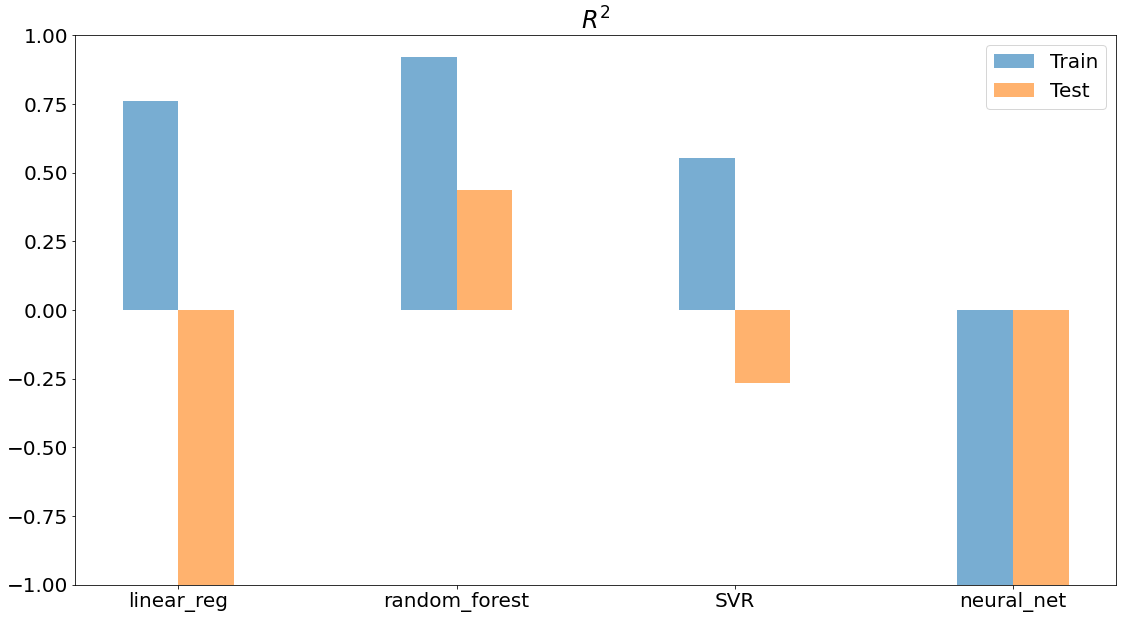

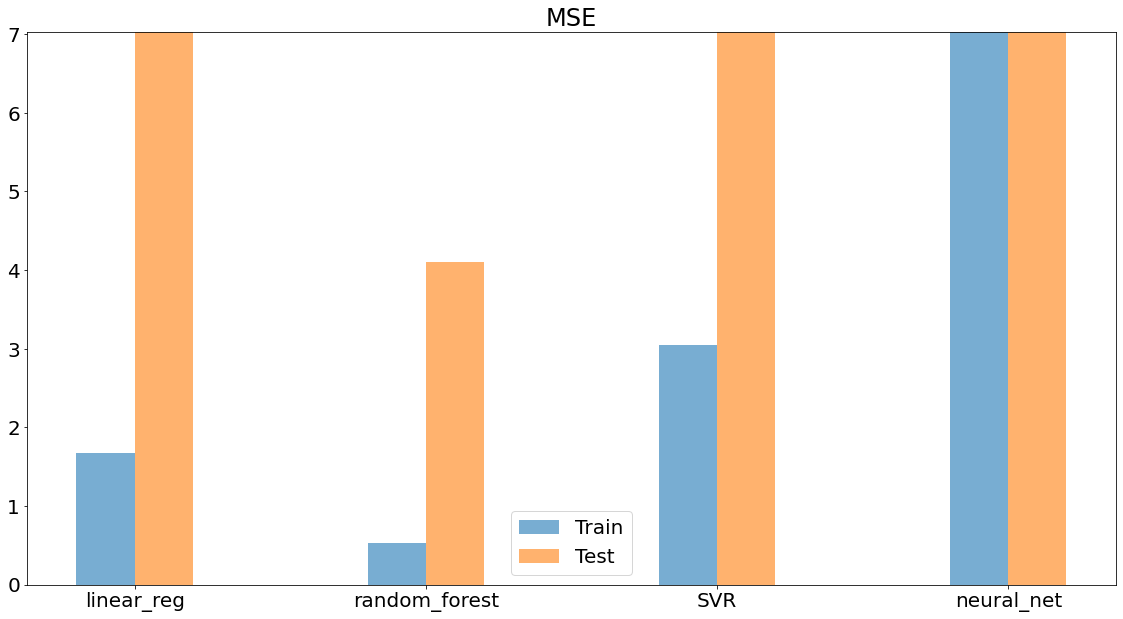

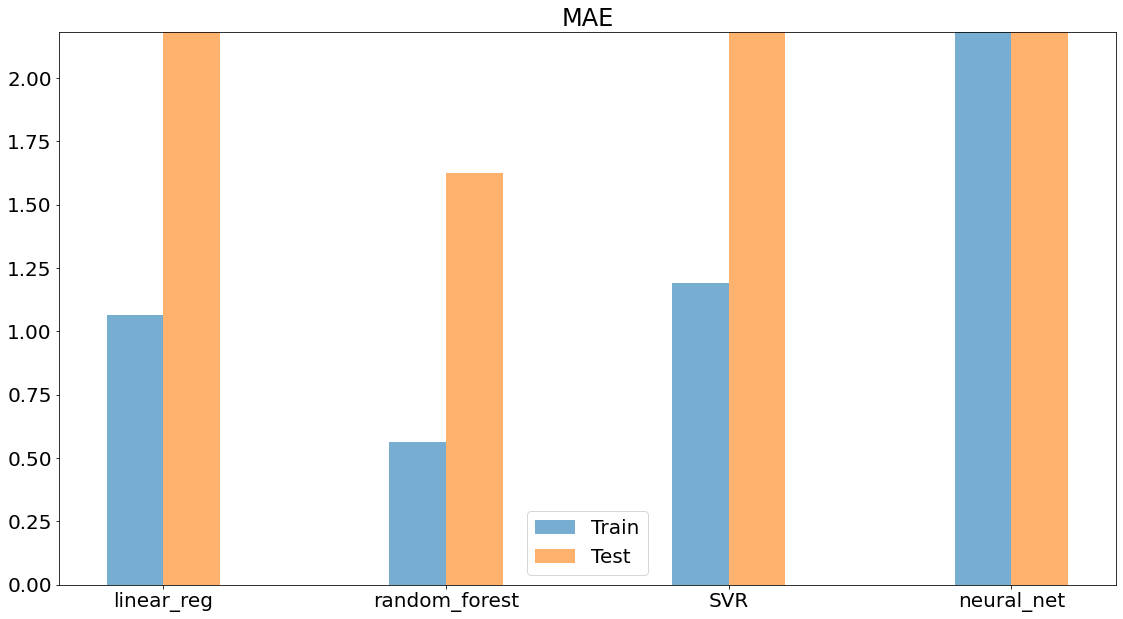

In [27]:
plot_metrics(eval_df,name='strategy_1')

In [29]:
from sklearn.model_selection import cross_validate

scoring = ['r2', 'neg_mean_squared_error','neg_mean_absolute_error']

model=lr

cv_dict={'model_name':[],'avg_r2_train':[],'avg_r2_test':[],'avg_mse_train':[],'avg_mse_test':[],'avg_mae_train':[],'avg_mae_test':[]}
num_repeats=10
for model_name,model in model_dict.items():
    print(model_name)
    cv_score = cross_validate(model, X, y, scoring=scoring, cv=10, n_jobs=-1,return_train_score=True)
    cv_dict['model_name'].append(model_name)
    cv_dict['avg_r2_train'].append(np.mean(cv_score['train_r2']))
    cv_dict['avg_r2_test'].append(np.mean(cv_score['test_r2']))
    cv_dict['avg_mse_train'].append(-1*np.mean(cv_score['train_neg_mean_squared_error']))
    cv_dict['avg_mse_test'].append(-1*np.mean(cv_score['test_neg_mean_squared_error']))
    cv_dict['avg_mae_train'].append(-1*np.mean(cv_score['train_neg_mean_absolute_error']))
    cv_dict['avg_mae_test'].append(-1*np.mean(cv_score['test_neg_mean_absolute_error']))
cv_df=pd.DataFrame.from_dict(cv_dict)
cv_df

linear_reg
random_forest
SVR
neural_net


,model_name,avg_r2_train,avg_r2_test,avg_mse_train,avg_mse_test,avg_mae_train,avg_mae_test
0,linear_reg,0.754480,-4.270689,1.721054,23.595294,1.088309,3.587173
1,random_forest,0.926390,-0.061304,0.514503,4.113692,0.555037,1.569611
2,SVR,0.525779,-0.809296,3.308806,6.674306,1.259863,2.083556
3,neural_net,-8.800266,-203.099708,69.038644,1241.655519,5.062554,11.757330


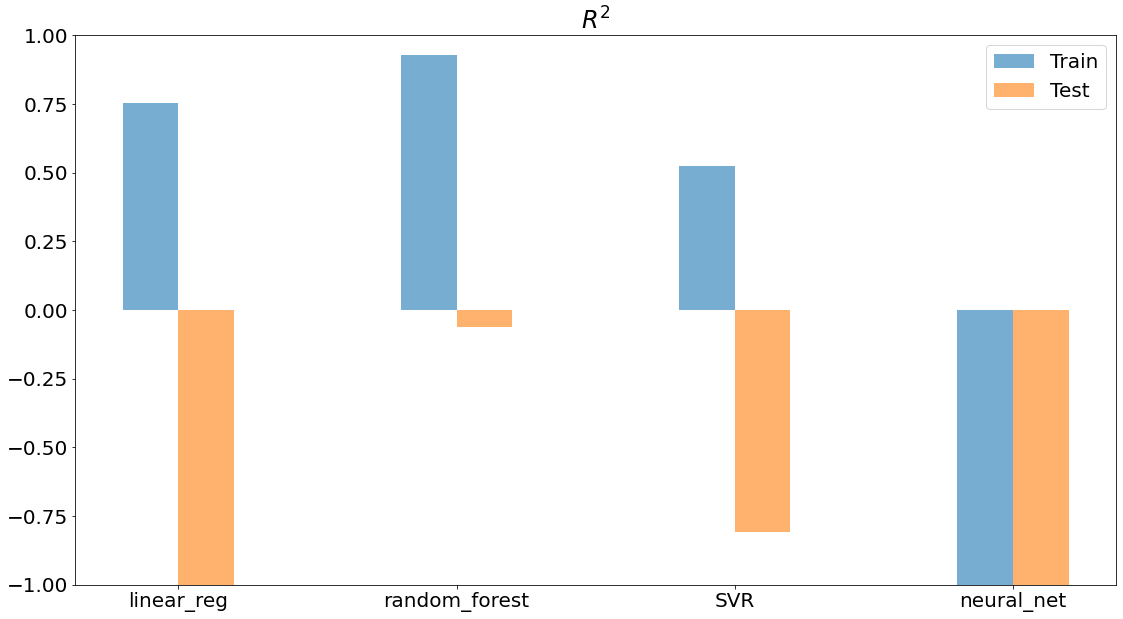

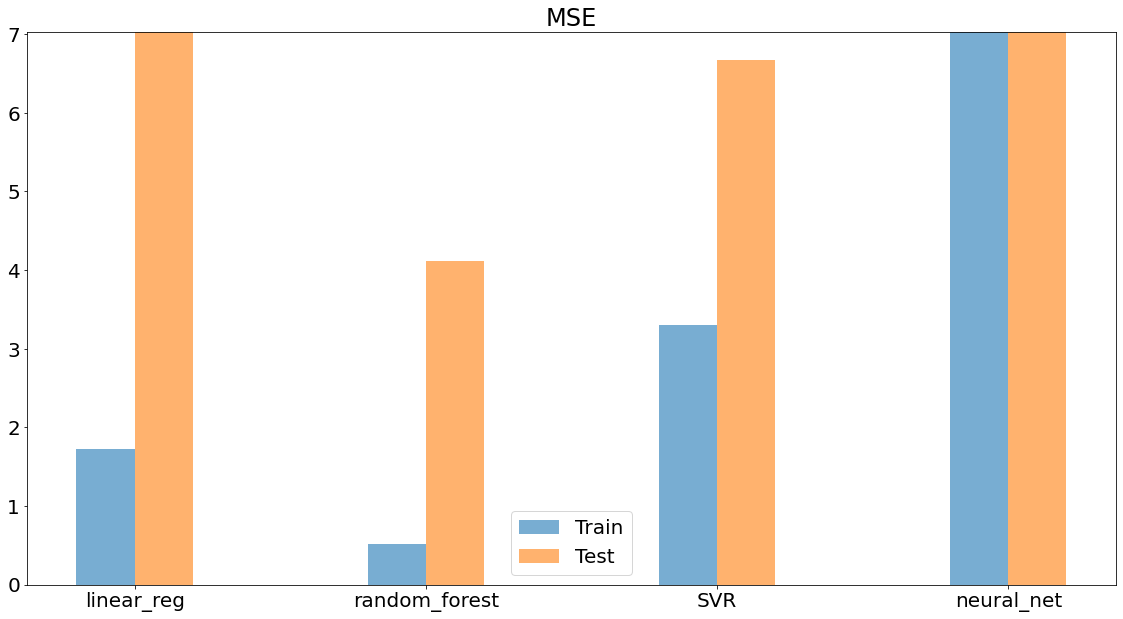

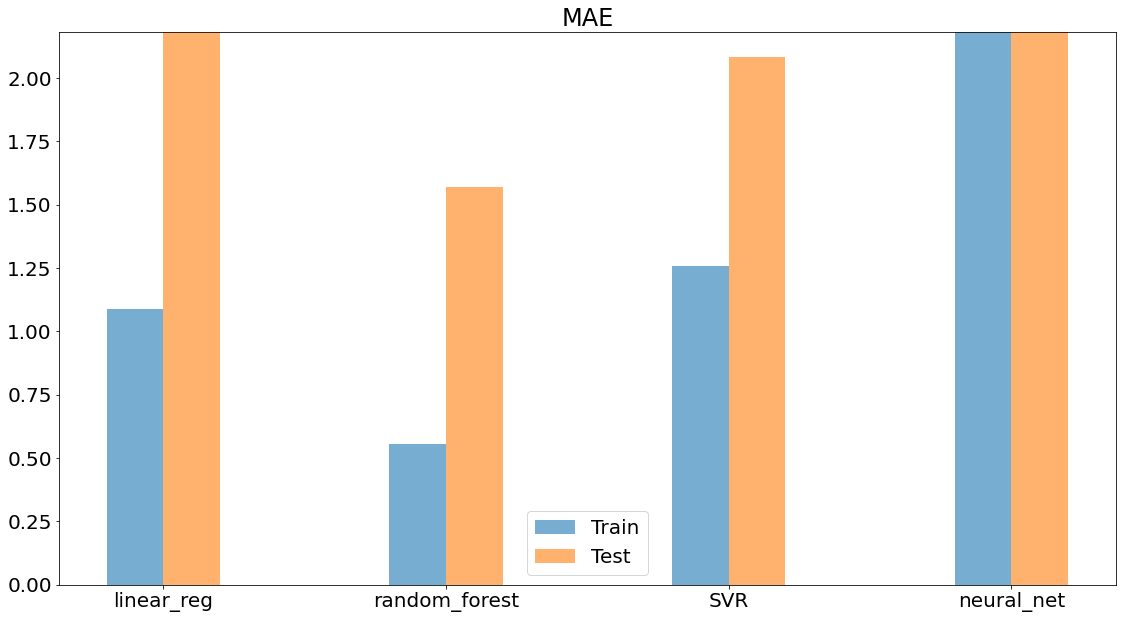

In [30]:
plot_metrics(cv_df,name='strategy_2')